In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df=pd.read_csv("olympics.csv",encoding = "ISO-8859-1")

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,# Summer,01 !,02 !,03 !,Total,# Winter,01 !,02 !,03 !,Total,# Games,01 !,02 !,03 !,Combined total
1,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
2,Belgium (BEL),25,37,52,53,142,20,1,1,3,5,45,38,53,56,147
3,Brazil (BRA),21,23,30,55,108,7,INF,-99,0,0,28,23,30,55,108
4,Bulgaria (BUL) [H],19,51,85,78,214,19,1,2,3,6,38,52,87,81,220


In [8]:
con=pyodbc.connect("Driver={SQL Server};Server=DESKTOP-0MFRJ4E;Database=bigdata;")
cur=con.cursor()

In [114]:
def preprocess(column,index):
    if df.iloc[index][column] in ["INF","NAN","-99"]:
        if index==0:
            return preprocess(column,index+1)
        else:
            return preprocess(column,index-1)
    else:
        return float(df.iloc[index][column])
        

In [12]:
len(df)

34

In [115]:

for i in range(1,len(df)):
    cur.execute("insert into exam2 values(?,?,?,?,?,?,?,?)",preprocess("1",i),
    preprocess("2",i),
    preprocess("3",i),
    preprocess("4",i),
    preprocess("6",i),
    preprocess("7",i),
    preprocess("8",i),
    preprocess("9",i),
    
    
    )
    

In [116]:
cur.commit()

[]

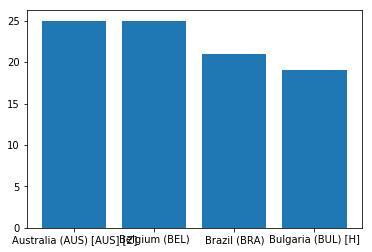

In [102]:
figure=plt.bar(df["0"][1:5],pd.Series(map(lambda x:  float(x),df["1"][1:5])))

plt.plot()

[]

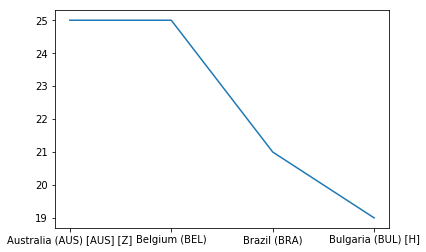

In [119]:
figure=plt.plot(df["0"][1:5],pd.Series(map(lambda x:  float(x),df["1"][1:5])))

plt.xlabel="countries"
plt.ylabel="games"
plt.plot()

[]

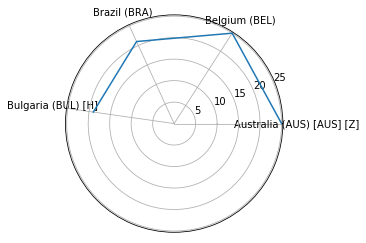

In [122]:
figure=plt.polar(df["0"][1:5],pd.Series(map(lambda x:  float(x),df["1"][1:5])))

plt.xlabel="countries"
plt.ylabel="summer games"
plt.plot()

[]

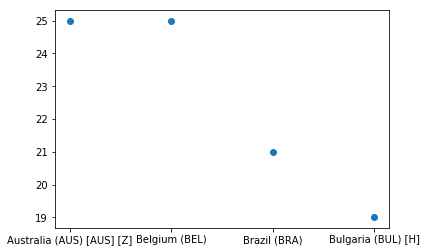

In [120]:
figure=plt.scatter(df["0"][1:5],pd.Series(map(lambda x:  float(x),df["1"][1:5])))

plt.xlabel="countries"
plt.ylabel="games"
plt.plot()

[]

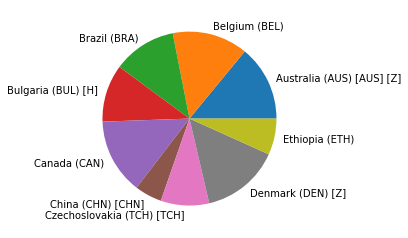

In [111]:
plt.pie(df["1"][1:10],labels=df["0"][1:10])
plt.plot()

In [96]:
pd.Series(map(lambda x:return float(x),df["1"][1:5]))

SyntaxError: invalid syntax (<ipython-input-96-2533f2b9be52>, line 1)

In [101]:
pd.Series(map(lambda x:  float(x),df["1"][1:5]))

0    25.0
1    25.0
2    21.0
3    19.0
dtype: float64